In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader


In [2]:
def encoded_pixels_to_masks(fname: str, df: pd.DataFrame):
    fname_df = df[df['ImageId'] == fname]
    masks = np.zeros((256 * 1600, 4), dtype=int) # float32 is V.Imp

    for i_row, row in fname_df.iterrows():
        cls_id = row['ClassId']
        encoded_pixels = row['EncodedPixels']
        if encoded_pixels is not np.nan:
            pixel_list = list(map(int, encoded_pixels.split(' ')))
            for i in range(0, len(pixel_list), 2):
                start_pixel = pixel_list[i] - 1
                num_pixel = pixel_list[i+1]
                masks[start_pixel:(start_pixel+num_pixel), cls_id-1] = 1
                
    masks = masks.reshape(256, 1600, 4, order='F')

    return masks

def masks_to_encoded_pixels(masks: np.ndarray):
    masks = masks.reshape(256*1600, 4, order='F')
    encoded_pixels_list = []
    for cls_id in range(4):
        cls_mask = masks[:, cls_id]
        cls_mask = cls_mask.reshape(256, 1600, order='F')
        cls_mask = cls_mask.T.flatten()
        prev_pixel = 0
        prev_pixel_val = 0
        encoded_pixels = []
        for i, pixel_val in enumerate(cls_mask):
            if pixel_val != prev_pixel_val:
                if pixel_val == 1:
                    start_pixel = i + 1
                    encoded_pixels.append(start_pixel - prev_pixel)
                else:
                    num_pixel = i - prev_pixel
                    encoded_pixels.append(num_pixel)
                prev_pixel = i
                prev_pixel_val = pixel_val
        encoded_pixels_list.append(encoded_pixels)
    return encoded_pixels_list # shape: 4x[]

### Sample example

In [3]:
train_val_csv = 'data/train.csv'
test_csv = 'data/test.csv'

df = pd.read_csv(train_val_csv)

df.ImageId

0       0002cc93b.jpg
1       0007a71bf.jpg
2       000a4bcdd.jpg
3       000f6bf48.jpg
4       0014fce06.jpg
            ...      
7090    ffcf72ecf.jpg
7091    fff02e9c5.jpg
7092    fffe98443.jpg
7093    ffff4eaa8.jpg
7094    ffffd67df.jpg
Name: ImageId, Length: 7095, dtype: object

In [4]:
# let's look at encoded pixels for the first image
img_id = '0002cc93b.jpg'
df[df.ImageId==img_id]

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...


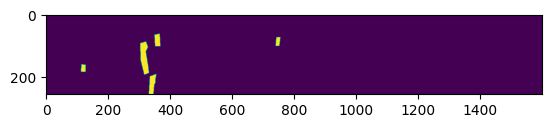

In [5]:
masks = encoded_pixels_to_masks(img_id, df, )
plt.imshow(masks[:,:,0]*255)

In [6]:
img = Image.open(os.path.join('data/train_images',img_id))

In [9]:
np.array(img).shape

(256, 1600, 3)

In [ ]:
img

In [ ]:
# let's encode masks back to encoded pixels
np.array(masks_to_encoded_pixels(masks)[0])

### Your code starts from here

In [ ]:
class SeverstalSteelDataset(Dataset):
    def __init__(self, fnames, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.fnames = fnames

    def __len__(self):
        return len(self.fnames)

    def __getitem__(self, idx):
        img_id = self.fnames[idx]
        # YOUR CODE HERE
        return fname, img, masks
    
# collate function if needed
def collate_fn(batch_items):
    # YOUR CODE HERE
    return batched_fnames, batched_imgs, batched_masks
    

In [ ]:
class SegModel(torch.nn.Module):
    def __init__(self):
        super(SegModel, self).__init__()
        # YOUR CODE HERE

    def forward(self, x):
        # YOUR CODE HERE
        return x

In [ ]:
def load_data(train_val_csv, test_csv, train_val_img_dir, test_img_dir):
    train_val_df = pd.read_csv(train_val_csv)
    train_val_fnames = pd.unique(df.ImageId)
    test_df = pd.read_csv(test_csv)
    test_fnames = pd.unique(test_df.ImageId)
    
    train_fnames, val_fnames = None, None# YOUR CODE HERE
    train_dataset = None # YOUR CODE HERE
    val_dataset = None # YOUR CODE HERE
    test_dataset = None # YOUR CODE HERE

    train_loader = None # YOUR CODE HERE
    val_loader = None # YOUR CODE HERE
    test_loader = None # YOUR CODE HERE
    
    return train_loader, val_loader, test_loader

In [ ]:
def init_model():
    ### YOUR CODE HERE
    return model, criterion, optimizer

def train(model, criterion, optimizer, loader, epochs):
    ### YOUR CODE HERE
    return model

def evaluate(model, loader):
    ### YOUR CODE HERE
    return submission_df

In [ ]:
#